In [17]:
!pip install finlab_crypto > finlab_crypto_log.txt

In [61]:
## Mac M1下載ta lib
conda install -c conda-forge ta-lib

Solving environment: done

## Package Plan ##

  environment location: /Users/gaozhichien/opt/anaconda3

  added / updated specs:
    - ta-lib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    libta-lib-0.4.0            |       haf1e3a3_0         438 KB  conda-forge
    ta-lib-0.4.19              |   py39hc89836e_3         370 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         808 KB

The following NEW packages will be INSTALLED:

  libta-lib          conda-forge/osx-64::libta-lib-0.4.0-haf1e3a3_0
  ta-lib             conda-forge/osx-64::ta-lib-0.4.19-py39hc89836e_3

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-4.12.0-py39hecd8cb5_0 --> conda-forge::conda-4.12.0-py39h6e9494a_0



libta-lib-0.4.0      | 438 KB    | ######################

In [1]:
import pandas as pd
import vectorbt as vbt
import talib
from finlab_crypto import Strategy
import numpy as np

In [3]:
import finlab_crypto

finlab_crypto.setup()   ##自動將下載的資料存進history

In [18]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')
ohlcv

All caught up..!


open      high       low     close  \
timestamp                                                           
2017-08-17 04:00:00+00:00   4261.48   4349.99   4261.32   4349.99   
2017-08-17 08:00:00+00:00   4333.32   4485.39   4333.32   4427.30   
2017-08-17 12:00:00+00:00   4436.06   4485.39   4333.42   4352.34   
2017-08-17 16:00:00+00:00   4352.33   4354.84   4200.74   4325.23   
2017-08-17 20:00:00+00:00   4307.56   4369.69   4258.56   4285.08   
...                             ...       ...       ...       ...   
2022-05-14 20:00:00+00:00  29338.79  30343.27  29300.00  30086.74   
2022-05-15 00:00:00+00:00  30086.74  30273.21  29553.47  29721.65   
2022-05-15 04:00:00+00:00  29721.66  30061.54  29480.00  29825.99   
2022-05-15 08:00:00+00:00  29826.00  30327.68  29547.48  30241.46   
2022-05-15 12:00:00+00:00  30241.46  30561.37  30119.85  30121.41   

                                volume    close_time      quote_av    trades  \
timestamp                                                                      
2017-08-17 04:00:00+00:00    82.088865  1.502957e+12  3.531943e+05     334.0   
2017-08-17 08:00:00+00:00    63.619882  1.502971e+12  2.825012e+05     248.0   
2017-08-17 12:00:00+00:00   174.562001  1.502986e+12  7.742388e+05     858.0   
2017-08-17 16:00:00+00:00   225.109716  1.503000e+12  9.652911e+05     986.0   
2017-08-17 20:00:00+00:00   249.769913  1.503014e+12  1.079545e+06    1001.0   
...                                ...           ...           ...       ...   
2022-05-14 20:00:00+00:00  7430.903780  1.652573e+12  2.216477e+08  155310.0   
2022-05-15 00:00:00+00:00  5969.182290  1.652587e+12  1.785654e+08  118706.0   
2022-05-15 04:00:00+00:00  5255.526380  1.652602e+12  1.565376e+08  122899.0   
2022-05-15 08:00:00+00:00  6947.025400  1.652616e+12  2.075947e+08  152106.0   
2022-05-15 12:00:00+00:00  4424.946750  1.652630e+12  1.342044e+08   97728.0   

                            tb_base_av   tb_quote_av       ignore  
timestamp                                                          
2017-08-17 04:00:00+00:00    64.013727  2.756474e+05  8048.127886  
2017-08-17 08:00:00+00:00    58.787633  2.610541e+05  8020.698096  
2017-08-17 12:00:00+00:00   125.184133  5.554198e+05  8133.190658  
2017-08-17 16:00:00+00:00   165.036363  7.078082e+05  8425.112852  
2017-08-17 20:00:00+00:00   203.226685  8.782870e+05  8733.911395  
...                                ...           ...          ...  
2022-05-14 20:00:00+00:00  3741.260110  1.116577e+08     0.000000  
2022-05-15 00:00:00+00:00  3069.013890  9.179689e+07     0.000000  
2022-05-15 04:00:00+00:00  2554.441830  7.610053e+07     0.000000  
2022-05-15 08:00:00+00:00  3685.273860  1.101631e+08     0.000000  
2022-05-15 12:00:00+00:00  2354.346920  7.141796e+07     0.000000  

[10378 rows x 11 columns]

In [19]:
data = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')

All caught up..!


## 雙均線策略

<AxesSubplot:>

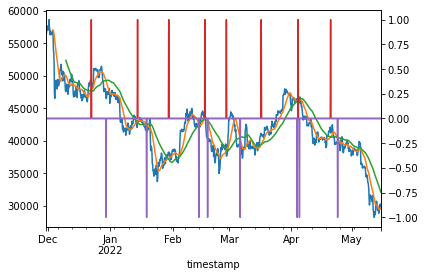

In [20]:
close = ohlcv.close.tail(1000)

sma20 = close.rolling(20).mean()
sma60 = close.rolling(60).mean()

entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())


close.plot()
sma20.plot()
sma60.plot()
entries.astype(int).plot(secondary_y = True)
(-exits.astype(int)).plot(secondary_y = True)

## 回測

In [21]:
import vectorbt as vbt

In [22]:
close = ohlcv.close

sma20 = close.rolling(20).mean()
sma60 = close.rolling(60).mean()

entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())

In [23]:
portfolio = vbt.Portfolio.from_signals(close, entries, exits, freq = '4h')

<AxesSubplot:xlabel='timestamp'>

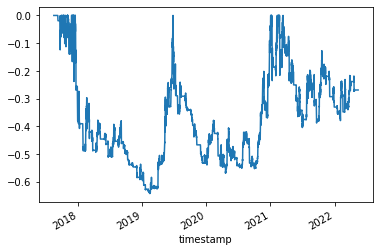

In [24]:
portfolio.drawdown().plot()

<AxesSubplot:xlabel='timestamp'>

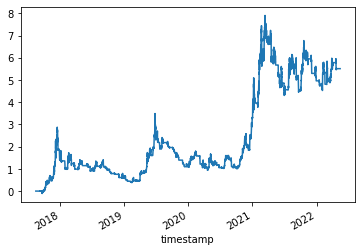

In [11]:
portfolio.cumulative_returns().plot()

In [25]:
portfolio.positions.records

id  col      size  entry_idx  entry_price  entry_fees  exit_idx  \
0      0    0  0.023527        136   4246.25201    0.099900       140   
1      1    0  0.025377        204   3931.69777    0.099776       225   
2      2    0  0.024191        240   3953.39945    0.095638       417   
3      3    0  0.022531        440   6091.08500    0.137237       513   
4      4    0  0.019661        547   7434.42700    0.146168       758   
..   ...  ...       ...        ...          ...         ...       ...   
96    96    0  0.014483       9852  43626.63305    0.631846      9860   
97    97    0  0.015412       9916  37644.09649    0.580169      9957   
98    98    0  0.014545      10020  41055.72471    0.597155     10127   
99    99    0  0.014565      10130  46206.25009    0.672972     10134   
100  100    0  0.016399      10227  41302.99173    0.677338     10248   

      exit_price  exit_fees         pnl    return  direction  status  \
0     4249.44630   0.099975   -0.124724 -0.001248          0       1   
1     3776.22000   0.095830   -4.141197 -0.041505          0       1   
2     5684.30001   0.137511   41.639834  0.435388          0       1   
3     6500.47302   0.146460    8.940119  0.065144          0       1   
4    14686.23906   0.288745  142.142569  0.972461          0       1   
..           ...        ...         ...       ...        ...     ...   
96   40138.76106   0.581331  -51.728131 -0.081868          0       1   
97   38823.74739   0.598350   17.002215  0.029306          0       1   
98   46360.94265   0.674319   75.892803  0.127091          0       1   
99   46599.17418   0.678694    4.371083  0.006495          0       1   
100  39736.79343   0.651654  -27.013478 -0.039882          0       1   

     parent_id  
0            0  
1            1  
2            2  
3            3  
4            4  
..         ...  
96          96  
97          97  
98          98  
99          99  
100        100  

[101 rows x 14 columns]

## 策略模組化

In [29]:
from finlab_crypto import Strategy   ##decorator

@Strategy()
def sma_strategy(ohlcv):
    close = ohlcv.close

    sma20 = close.rolling(20).mean()
    sma60 = close.rolling(60).mean()

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    figures = {
        'overlaps' :{
            'sma20' : sma20,
            'sma60' :sma60
        }
    }
    return entries, exits, figures


portfolio = sma_strategy.backtest(ohlcv, freq = '4h', fees = 0.001, slippage = 0.001, plot = True)     ##滑價slippage

In [30]:
sma_strategy(ohlcv)

## 策略最佳化

In [31]:
import numpy as np

np.arange(20, 300, 10)

array([ 20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130, 140,
       150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270,
       280, 290])

In [32]:
from finlab_crypto import Strategy   ##decorator

@Strategy(sma1=20, sma2=60)
def sma_strategy(ohlcv):
    close = ohlcv.close

    sma20 = close.rolling(sma_strategy.sma1).mean()
    sma60 = close.rolling(sma_strategy.sma2).mean()

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    figures = {
        'overlaps' :{
            'sma20' : sma20,
            'sma60' :sma60
        }
    }
    return entries, exits, figures

  0%|          | 0/784 [00:00<?, ?it/s]

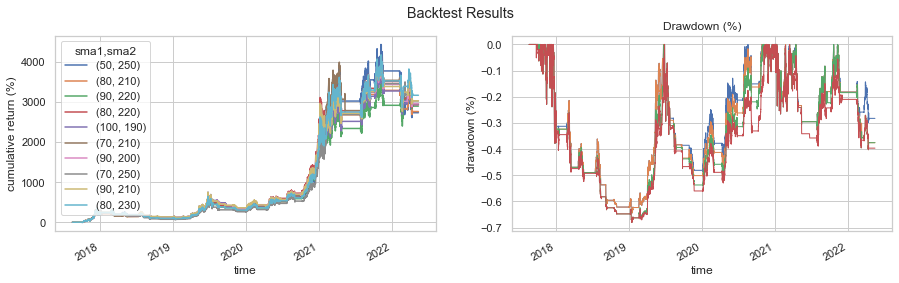

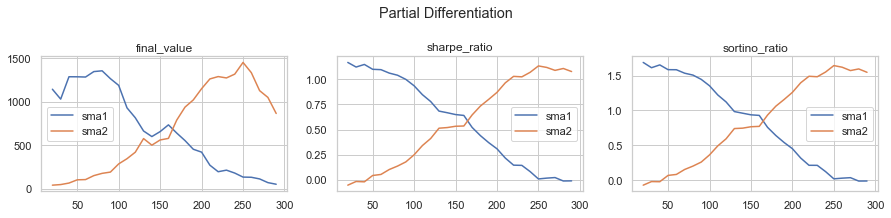

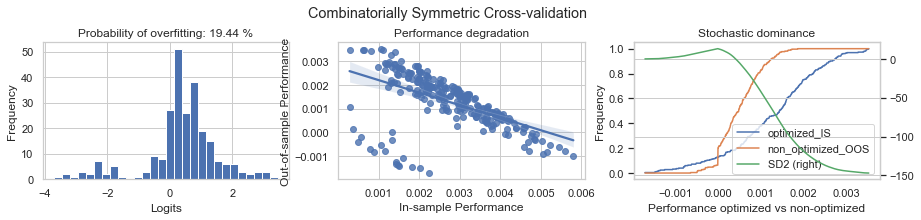

Output()

In [33]:
variables={'sma1' : np.arange(20, 300, 10), 'sma2' : np.arange(20, 300, 10)}
portfolio = sma_strategy.backtest(ohlcv,  variables, freq = '4h', fees = 0.001, slippage = 0.001, plot = True)     ##滑價slippage

## ETH

In [34]:
ohlcv_eth = finlab_crypto.crawler.get_all_binance('ETHUSDT', '4h')
ohlcv_eth

All caught up..!


open     high      low    close       volume  \
timestamp                                                                    
2017-08-17 04:00:00+00:00   301.13   307.96   298.00   307.96   1561.95305   
2017-08-17 08:00:00+00:00   307.95   312.00   307.00   308.95   1177.71088   
2017-08-17 12:00:00+00:00   308.95   310.51   303.56   307.06   1882.05267   
2017-08-17 16:00:00+00:00   307.74   312.18   298.21   301.60   1208.05192   
2017-08-17 20:00:00+00:00   301.60   310.85   299.01   302.00   1200.94182   
...                            ...      ...      ...      ...          ...   
2022-05-14 20:00:00+00:00  1996.05  2066.66  1992.16  2056.48  71540.94140   
2022-05-15 00:00:00+00:00  2056.47  2079.40  2000.68  2014.20  71458.58450   
2022-05-15 04:00:00+00:00  2014.20  2049.30  2002.02  2037.55  57959.02190   
2022-05-15 08:00:00+00:00  2037.55  2086.65  2018.52  2080.49  84714.77430   
2022-05-15 12:00:00+00:00  2080.48  2100.00  2066.00  2072.23  52843.83910   

                             close_time      quote_av    trades   tb_base_av  \
timestamp                                                                      
2017-08-17 04:00:00+00:00  1.502957e+12  4.734877e+05     711.0   1260.38649   
2017-08-17 08:00:00+00:00  1.502971e+12  3.645453e+05     775.0   1093.84885   
2017-08-17 12:00:00+00:00  1.502986e+12  5.786449e+05    1140.0   1742.14642   
2017-08-17 16:00:00+00:00  1.503000e+12  3.702091e+05     957.0   1097.32020   
2017-08-17 20:00:00+00:00  1.503014e+12  3.677683e+05     939.0   1030.88803   
...                                 ...           ...       ...          ...   
2022-05-14 20:00:00+00:00  1.652573e+12  1.454613e+08   98488.0  35207.98590   
2022-05-15 00:00:00+00:00  1.652587e+12  1.457380e+08   91842.0  35031.03880   
2022-05-15 04:00:00+00:00  1.652602e+12  1.175919e+08   88378.0  30259.28290   
2022-05-15 08:00:00+00:00  1.652616e+12  1.734096e+08  107784.0  42970.30360   
2022-05-15 12:00:00+00:00  1.652630e+12  1.100748e+08   68003.0  26452.36470   

                            tb_quote_av        ignore  
timestamp                                              
2017-08-17 04:00:00+00:00  3.820972e+05  46884.543391  
2017-08-17 08:00:00+00:00  3.385876e+05  46866.630800  
2017-08-17 12:00:00+00:00  5.356271e+05  47528.189091  
2017-08-17 16:00:00+00:00  3.365462e+05  48886.753370  
2017-08-17 20:00:00+00:00  3.158473e+05  50579.872288  
...                                 ...           ...  
2022-05-14 20:00:00+00:00  7.161200e+07      0.000000  
2022-05-15 00:00:00+00:00  7.147764e+07      0.000000  
2022-05-15 04:00:00+00:00  6.137263e+07      0.000000  
2022-05-15 08:00:00+00:00  8.799926e+07      0.000000  
2022-05-15 12:00:00+00:00  5.510920e+07      0.000000  

[10378 rows x 11 columns]

  0%|          | 0/784 [00:00<?, ?it/s]

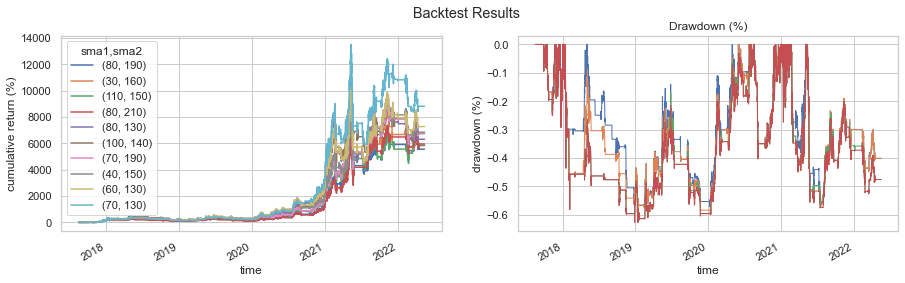

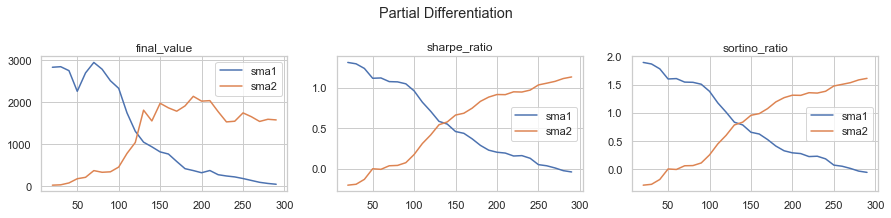

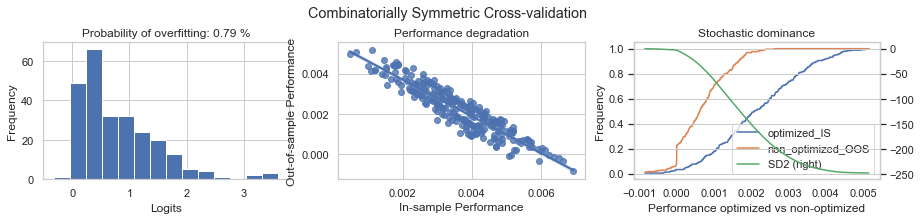

Output()

In [35]:
from finlab_crypto import Strategy   ##decorator

@Strategy(sma1=20, sma2=60)
def sma_strategy(ohlcv_eth):
    close = ohlcv_eth.close

    sma20 = close.rolling(sma_strategy.sma1).mean()
    sma60 = close.rolling(sma_strategy.sma2).mean()

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    figures = {
        'overlaps' :{
            'sma20' : sma20,
            'sma60' :sma60
        }
    }
    return entries, exits, figures

variables={'sma1' : np.arange(20, 300, 10), 'sma2' : np.arange(20, 300, 10)}
portfolio_eth = sma_strategy.backtest(ohlcv_eth,  variables, freq = '4h', fees = 0.001, slippage = 0.001, plot = True)     ##滑價slippage

## 趨勢交易策略（利用filter來過濾雜訊)

In [36]:
!pip install finlab_crypto > log.txt
!pip install talib-binary > log.txt

ERROR: Could not find a version that satisfies the requirement talib-binary (from versions: none)
ERROR: No matching distribution found for talib-binary


In [37]:
import finlab_crypto
finlab_crypto.setup()

<AxesSubplot:>

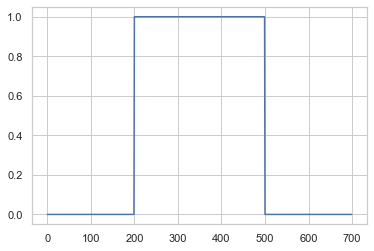

In [38]:
import pandas as pd
s = pd.Series([0]*200 + [1]*300 +[0]*200)
s.plot()

## finlab_crypto indicators

In [39]:
from finlab_crypto import indicators
##查看indicators原始程式碼
indicators??

Type:        module
String form: <module 'finlab_crypto.indicators' from '/Users/gaozhichien/opt/anaconda3/lib/python3.9/site-packages/finlab_crypto/indicators.py'>
File:        ~/opt/anaconda3/lib/python3.9/site-packages/finlab_crypto/indicators.py
Source:     
import sys
import math
import scipy
import numpy as np
import pandas as pd
import scipy.signal as sg
import matplotlib.pyplot as plt

def sma(price, n):
  return price.rolling(n).mean()
def wma(price, n):
  return price.ewm(com=n).mean()

# Highpass filter by John F. Ehlers, converted by DdlV
def highpass(Data, n=48):
  a     = (0.707*2*math.pi) / n

  alpha1 = (math.cos(a)+math.sin(a)-1)/math.cos(a);
  b     = 1-alpha1/2
  c     = 1-alpha1

  ret = [0] * len(Data)
  for i in range(2, len(Data)):
    ret[i] = b*b*(Data.iloc[i]-2*Data[i-1]+Data.iloc[i-2])+2*c*ret[i-1]-c*c*ret[i-2]

  return pd.Series(ret, index=Data.index)

# lowpass filter
def lowpass(Data,n):
  a = 2.0/(1+n)

  lp = [Data[0], Data[1]] + [0] * (len(Data) - 2)
 

## filters

In [40]:
indicators.trends

{'sma': <function finlab_crypto.indicators.sma(price, n)>,
 'wma': <function finlab_crypto.indicators.wma(price, n)>,
 'lowpass': <function finlab_crypto.indicators.lowpass(Data, n)>,
 'hullma': <function finlab_crypto.indicators.hullma(price, n)>,
 'zlma': <function finlab_crypto.indicators.zlma(price, n)>,
 'alma': <function finlab_crypto.indicators.alma(price, n)>,
 'detrend': <function finlab_crypto.indicators.detrend(price, n)>,
 'linear_reg': <function finlab_crypto.indicators.linear_reg(price, n)>}

<AxesSubplot:>

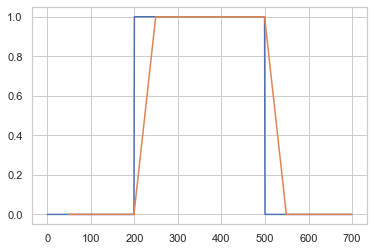

In [41]:
trend = indicators.trends['sma'](s, 50)
s.plot()
trend.plot()

## Multiple filters

In [42]:
for name, func in indicators.trends.items():
    print(name, func)

sma <function sma at 0x7f9b01cf9790>
wma <function wma at 0x7f9b01cf93a0>
lowpass <function lowpass at 0x7f9b1b83aee0>
hullma <function hullma at 0x7f9b1b83af70>
zlma <function zlma at 0x7f9b1b83e040>
alma <function alma at 0x7f9b1b83e0d0>
detrend <function detrend at 0x7f9b1b83e160>
linear_reg <function linear_reg at 0x7f9b1b83e1f0>


original_price  sma       wma   lowpass    hullma      zlma  alma  \
0                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
1                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
2                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
3                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
4                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
..              ...  ...       ...       ...       ...       ...   ...   
695               0  0.0  0.020569 -0.002738 -0.022644  0.008054   0.0   
696               0  0.0  0.020166 -0.002646 -0.022224  0.007896   0.0   
697               0  0.0  0.019771 -0.002557 -0.021811  0.007741   0.0   
698               0  0.0  0.019383 -0.002471 -0.021406  0.007590   0.0   
699               0  0.0  0.019003 -0.002388 -0.021008  0.007441   0.0   

          detrend  linear_reg  
0    0.000000e+00         NaN  
1    0.000000e+00         NaN  
2    0.000000e+00         NaN  
3    0.000000e+00         NaN  
4    0.000000e+00         NaN  
..            ...         ...  
695 -4.596104e-07         0.0  
696 -4.227709e-07         0.0  
697 -3.888730e-07         0.0  
698 -3.576826e-07         0.0  
699 -3.289846e-07         0.0  

[700 rows x 9 columns]

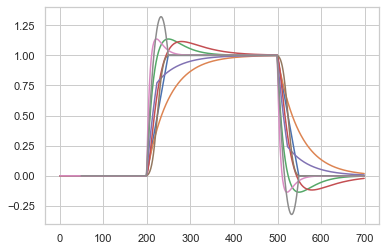

In [43]:
filter_results = pd.DataFrame()
filter_results["original_price"] = s


for name, func in indicators.trends.items():
    trend = func(s, 50)
    filter_results[name]  = trend
    trend.plot()
filter_results

In [44]:
filter_results

original_price  sma       wma   lowpass    hullma      zlma  alma  \
0                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
1                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
2                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
3                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
4                 0  NaN  0.000000  0.000000  0.000000       NaN   0.0   
..              ...  ...       ...       ...       ...       ...   ...   
695               0  0.0  0.020569 -0.002738 -0.022644  0.008054   0.0   
696               0  0.0  0.020166 -0.002646 -0.022224  0.007896   0.0   
697               0  0.0  0.019771 -0.002557 -0.021811  0.007741   0.0   
698               0  0.0  0.019383 -0.002471 -0.021406  0.007590   0.0   
699               0  0.0  0.019003 -0.002388 -0.021008  0.007441   0.0   

          detrend  linear_reg  
0    0.000000e+00         NaN  
1    0.000000e+00         NaN  
2    0.000000e+00         NaN  
3    0.000000e+00         NaN  
4    0.000000e+00         NaN  
..            ...         ...  
695 -4.596104e-07         0.0  
696 -4.227709e-07         0.0  
697 -3.888730e-07         0.0  
698 -3.576826e-07         0.0  
699 -3.289846e-07         0.0  

[700 rows x 9 columns]

In [45]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '4h')
ohlcv

All caught up..!


open      high       low     close  \
timestamp                                                           
2017-08-17 04:00:00+00:00   4261.48   4349.99   4261.32   4349.99   
2017-08-17 08:00:00+00:00   4333.32   4485.39   4333.32   4427.30   
2017-08-17 12:00:00+00:00   4436.06   4485.39   4333.42   4352.34   
2017-08-17 16:00:00+00:00   4352.33   4354.84   4200.74   4325.23   
2017-08-17 20:00:00+00:00   4307.56   4369.69   4258.56   4285.08   
...                             ...       ...       ...       ...   
2022-05-14 20:00:00+00:00  29338.79  30343.27  29300.00  30086.74   
2022-05-15 00:00:00+00:00  30086.74  30273.21  29553.47  29721.65   
2022-05-15 04:00:00+00:00  29721.66  30061.54  29480.00  29825.99   
2022-05-15 08:00:00+00:00  29826.00  30327.68  29547.48  30241.46   
2022-05-15 12:00:00+00:00  30241.46  30561.37  30101.00  30170.54   

                                volume    close_time      quote_av    trades  \
timestamp                                                                      
2017-08-17 04:00:00+00:00    82.088865  1.502957e+12  3.531943e+05     334.0   
2017-08-17 08:00:00+00:00    63.619882  1.502971e+12  2.825012e+05     248.0   
2017-08-17 12:00:00+00:00   174.562001  1.502986e+12  7.742388e+05     858.0   
2017-08-17 16:00:00+00:00   225.109716  1.503000e+12  9.652911e+05     986.0   
2017-08-17 20:00:00+00:00   249.769913  1.503014e+12  1.079545e+06    1001.0   
...                                ...           ...           ...       ...   
2022-05-14 20:00:00+00:00  7430.903780  1.652573e+12  2.216477e+08  155310.0   
2022-05-15 00:00:00+00:00  5969.182290  1.652587e+12  1.785654e+08  118706.0   
2022-05-15 04:00:00+00:00  5255.526380  1.652602e+12  1.565376e+08  122899.0   
2022-05-15 08:00:00+00:00  6947.025400  1.652616e+12  2.075947e+08  152106.0   
2022-05-15 12:00:00+00:00  4486.042420  1.652630e+12  1.360460e+08   99620.0   

                            tb_base_av   tb_quote_av       ignore  
timestamp                                                          
2017-08-17 04:00:00+00:00    64.013727  2.756474e+05  8048.127886  
2017-08-17 08:00:00+00:00    58.787633  2.610541e+05  8020.698096  
2017-08-17 12:00:00+00:00   125.184133  5.554198e+05  8133.190658  
2017-08-17 16:00:00+00:00   165.036363  7.078082e+05  8425.112852  
2017-08-17 20:00:00+00:00   203.226685  8.782870e+05  8733.911395  
...                                ...           ...          ...  
2022-05-14 20:00:00+00:00  3741.260110  1.116577e+08     0.000000  
2022-05-15 00:00:00+00:00  3069.013890  9.179689e+07     0.000000  
2022-05-15 04:00:00+00:00  2554.441830  7.610053e+07     0.000000  
2022-05-15 08:00:00+00:00  3685.273860  1.101631e+08     0.000000  
2022-05-15 12:00:00+00:00  2389.695710  7.248331e+07     0.000000  

[10378 rows x 11 columns]

<AxesSubplot:>

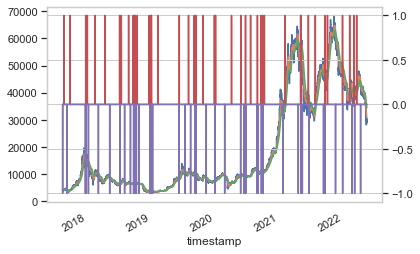

In [46]:
filter_name = "wma"   ##可用這邊改不同的策略名稱

close = ohlcv.close

sma20 = indicators.trends[filter_name](close, 20)
sma60 = indicators.trends[filter_name](close, 60)

entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())


close.plot()
sma20.plot()
sma60.plot()
entries.astype(int).plot(secondary_y = True)
(-exits.astype(int)).plot(secondary_y = True)

## 趨勢策略最佳化

In [47]:
from finlab_crypto import Strategy

##原本
@Strategy()
def trend_strategy(ohlcv):
    filter_name = "wma"   ##可用這邊改不同的策略名稱

    close = ohlcv.close

    sma20 = indicators.trends[filter_name](close, 20)
    sma60 = indicators.trends[filter_name](close, 60)

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    return entries, exits

trend_strategy.backtest(ohlcv, freq = '4h', plot = True)

In [48]:
trend_strategy(ohlcv)

In [49]:
list(indicators.trends.keys())

['sma', 'wma', 'lowpass', 'hullma', 'zlma', 'alma', 'detrend', 'linear_reg']

  0%|          | 0/1568 [00:00<?, ?it/s]

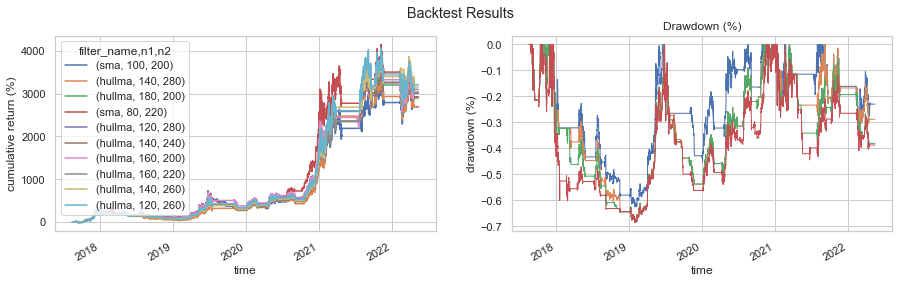

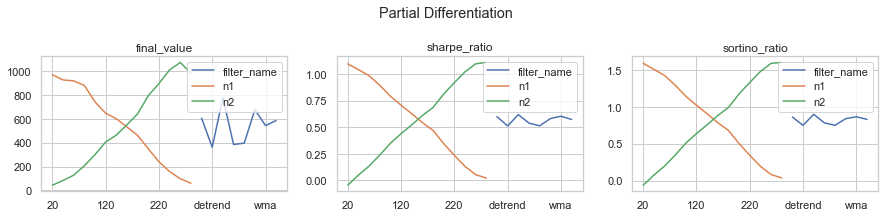

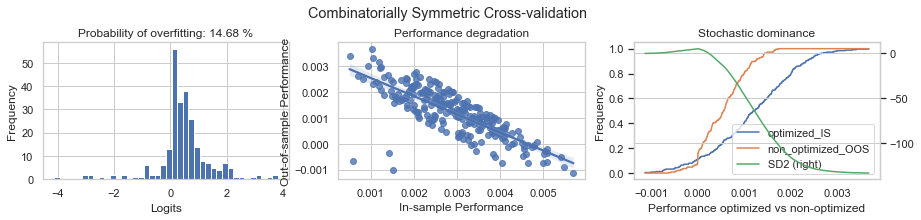

Output()

In [50]:
##最佳化

@Strategy(filter_name = "sma", n1=20, n2=60)
def trend_strategy(ohlcv):
    filter_name = trend_strategy.filter_name   ##可用這邊改不同的策略名稱
    v1 = trend_strategy.n1
    v2 = trend_strategy.n2

    close = ohlcv.close

    sma20 = indicators.trends[filter_name](close, v1)
    sma60 = indicators.trends[filter_name](close, v2)

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    return entries, exits

variables = {
    "filter_name" : indicators.trends.keys(),  ##['sma', 'wma', 'lowpass', 'hullma', 'zlma', 'alma', 'detrend', 'linear_reg']
    "n1" : np.arange(20, 300, 20),
    "n2" : np.arange(20, 300, 20)
}
portfolio = trend_strategy.backtest(ohlcv, variables=variables, freq = '4h', plot = True)

## 驗證策略(filter)是否有效 (Boostrap)

利用Bootstrap驗證價格究竟是random walk還是真的有趨勢在，才能達到足夠的信心水準
1. Detrend daily returns
2. Resample
3. Plots

### Step1 Detrend daily returns

In [71]:
#1. detrend daily returns
ret = portfolio.daily_returns()
ret_detrend = (ret-ret.mean())
samples = (ret_detrend).unstack().dropna()
samples

filter_name  n1   n2   timestamp                
sma          20   20   2017-08-17 00:00:00+00:00    0.0
                       2017-08-18 00:00:00+00:00    0.0
                       2017-08-19 00:00:00+00:00    0.0
                       2017-08-20 00:00:00+00:00    0.0
                       2017-08-21 00:00:00+00:00    0.0
                                                   ... 
linear_reg   280  280  2022-05-11 00:00:00+00:00    0.0
                       2022-05-12 00:00:00+00:00    0.0
                       2022-05-13 00:00:00+00:00    0.0
                       2022-05-14 00:00:00+00:00    0.0
                       2022-05-15 00:00:00+00:00    0.0
Length: 2717344, dtype: float64

<AxesSubplot:xlabel='timestamp'>

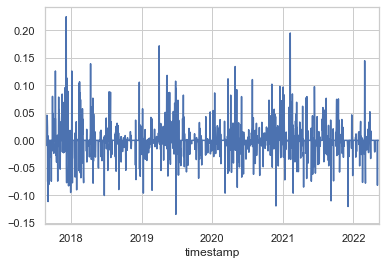

In [76]:
portfolio.daily_returns().iloc[:,1].plot()

In [77]:
portfolio.daily_returns().iloc[:,1].sum()

2.0650729278367685

<AxesSubplot:xlabel='timestamp'>

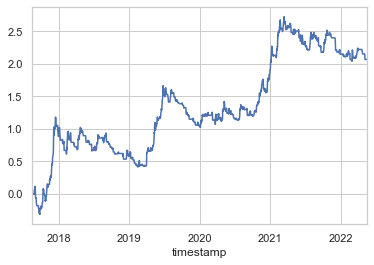

In [79]:
portfolio.daily_returns().iloc[:,1].cumsum().plot()

<AxesSubplot:xlabel='timestamp'>

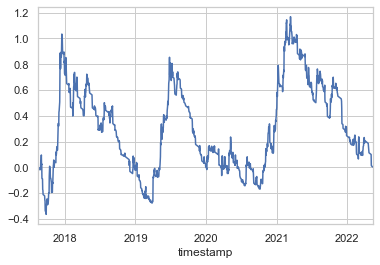

In [81]:
s = portfolio.daily_returns().iloc[:,1]

(s-s.mean()).cumsum().plot()

In [88]:
detrend = portfolio.daily_returns() - portfolio.daily_returns().mean()
samples = detrend.unstack().values      ##雜訊
samples

array([0., 0., 0., ..., 0., 0., 0.])

### Step2 Resample

看雜訊算出來的績效是什麼樣子

<AxesSubplot:>

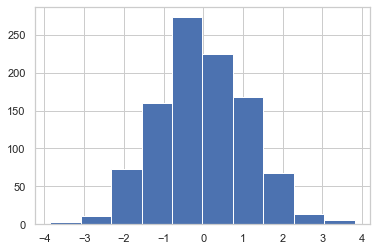

In [97]:
##算雜訊中的績效
import random
ndays = len(portfolio.daily_returns())
random.choices(samples, k=ndays) 

random_returns = []
for i in range(1000):
    random_returns.append(sum(random.choices(samples, k=ndays)))   #計算出1000種的累積績效

pd.Series(random_returns).hist()

In [117]:
portfolio.final_value().sort_values()

filter_name  n1   n2 
zlma         40   20       16.945062
detrend      120  40       18.393596
hullma       260  120      18.663578
                  140      18.974218
sma          220  80       19.155165
                            ...     
hullma       140  240    3127.858327
             160  200    3148.516888
                  220    3202.459661
             140  260    3258.384940
             120  260    3312.618195
Name: final_value, Length: 1568, dtype: float64

### Step3 Plots

In [119]:
best_result = portfolio.final_value().sort_values().index[-1]     ##找出最大的index
best_result

('hullma', 120, 260)

In [123]:
best_result_value = portfolio.daily_returns()[best_result].sum()   ##計算最好的策略每一天的加總的績效
best_result_value

4.250042345287852

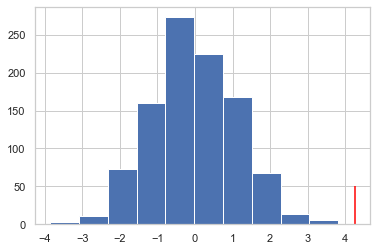

In [127]:
import matplotlib.pyplot as plt

pd.Series(random_returns).hist()
plt.vlines(best_result_value, 0, 50, color = "red")

## 策略濾網(Market Meanness Index)

利用統計的方法，判斷出趨勢正在發生或只是盤整而已

參考：https://financial-hacker.com/the-market-meanness-index/

In [129]:
import finlab_crypto

finlab_crypto.setup()   ##自動將下載的資料存進history

In [136]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '1h')
ohlcv

All caught up..!


open      high       low     close  \
timestamp                                                           
2017-08-17 04:00:00+00:00   4261.48   4313.62   4261.32   4308.83   
2017-08-17 05:00:00+00:00   4308.83   4328.69   4291.37   4315.32   
2017-08-17 06:00:00+00:00   4330.29   4345.45   4309.37   4324.35   
2017-08-17 07:00:00+00:00   4316.62   4349.99   4287.41   4349.99   
2017-08-17 08:00:00+00:00   4333.32   4377.85   4333.32   4360.69   
...                             ...       ...       ...       ...   
2022-05-15 15:00:00+00:00  29974.67  30178.41  29847.82  30013.47   
2022-05-15 16:00:00+00:00  30013.46  30296.36  29950.01  30213.05   
2022-05-15 17:00:00+00:00  30213.05  30293.22  29962.95  29990.00   
2022-05-15 18:00:00+00:00  29990.01  30423.00  29936.49  30312.10   
2022-05-15 19:00:00+00:00  30312.11  30367.41  30190.00  30252.37   

                                volume    close_time      quote_av   trades  \
timestamp                                                                     
2017-08-17 04:00:00+00:00    47.181009  1.502946e+12  2.023661e+05    171.0   
2017-08-17 05:00:00+00:00    23.234916  1.502950e+12  1.003048e+05    102.0   
2017-08-17 06:00:00+00:00     7.229691  1.502953e+12  3.128231e+04     36.0   
2017-08-17 07:00:00+00:00     4.443249  1.502957e+12  1.924106e+04     25.0   
2017-08-17 08:00:00+00:00     0.972807  1.502960e+12  4.239504e+03     28.0   
...                                ...           ...           ...      ...   
2022-05-15 15:00:00+00:00  1516.247100  1.652630e+12  4.546726e+07  40374.0   
2022-05-15 16:00:00+00:00  1946.545000  1.652634e+12  5.861379e+07  45671.0   
2022-05-15 17:00:00+00:00  1233.809880  1.652638e+12  3.720175e+07  31497.0   
2022-05-15 18:00:00+00:00  1902.528480  1.652641e+12  5.741935e+07  44056.0   
2022-05-15 19:00:00+00:00   382.532830  1.652645e+12  1.157790e+07  11604.0   

                            tb_base_av   tb_quote_av       ignore  
timestamp                                                          
2017-08-17 04:00:00+00:00    35.160503  1.509525e+05  7887.635513  
2017-08-17 05:00:00+00:00    21.448071  9.260828e+04  8039.262402  
2017-08-17 06:00:00+00:00     4.802861  2.079532e+04  8041.760498  
2017-08-17 07:00:00+00:00     2.602292  1.129135e+04  8048.127886  
2017-08-17 08:00:00+00:00     0.814655  3.552747e+03  8018.036500  
...                                ...           ...          ...  
2022-05-15 15:00:00+00:00   734.252020  2.201884e+07     0.000000  
2022-05-15 16:00:00+00:00   932.583540  2.808980e+07     0.000000  
2022-05-15 17:00:00+00:00   574.531760  1.732652e+07     0.000000  
2022-05-15 18:00:00+00:00  1025.440280  3.095696e+07     0.000000  
2022-05-15 19:00:00+00:00   190.642850  5.769721e+06     0.000000  

[41458 rows x 11 columns]

  0%|          | 0/256 [00:00<?, ?it/s]

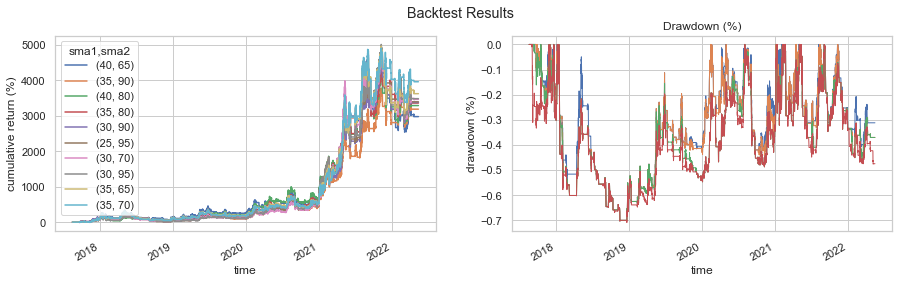

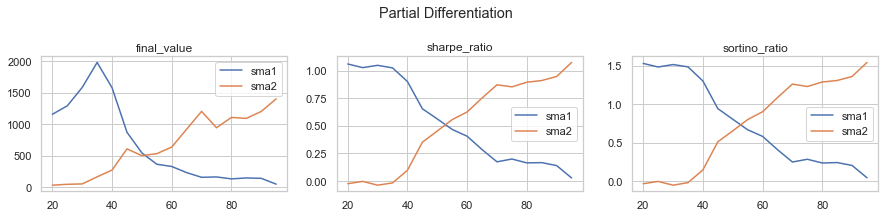

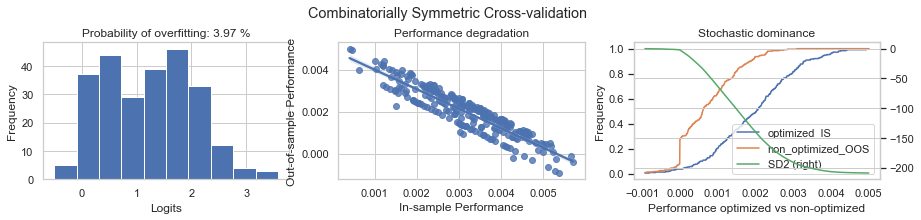

Output()

In [131]:
from finlab_crypto import Strategy   ##decorator

@Strategy(sma1=20, sma2=60)
def sma_strategy(ohlcv_eth):
    close = ohlcv_eth.close

    sma20 = close.rolling(sma_strategy.sma1).mean()
    sma60 = close.rolling(sma_strategy.sma2).mean()

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    figures = {
        'overlaps' :{
            'sma20' : sma20,
            'sma60' :sma60
        }
    }
    return entries, exits, figures

variables={'sma1' : np.arange(20, 100, 5), 'sma2' : np.arange(20, 100, 5)}   ##最佳化參數調整為較小值 目的做交易次數較高的策略
portfolio_eth = sma_strategy.backtest(ohlcv_eth,  variables, freq = '4h', fees = 0.001, slippage = 0.001, plot = True)     ##滑價slippage

### 利用MMI做優化策略

若價格在中位數之上或之下 為有趨勢
若價格穿越中位數 則為盤整狀態

![title](img/MMI.png)

In [137]:
ohlcv.close

timestamp
2017-08-17 04:00:00+00:00     4308.83
2017-08-17 05:00:00+00:00     4315.32
2017-08-17 06:00:00+00:00     4324.35
2017-08-17 07:00:00+00:00     4349.99
2017-08-17 08:00:00+00:00     4360.69
                               ...   
2022-05-15 15:00:00+00:00    30013.47
2022-05-15 16:00:00+00:00    30213.05
2022-05-15 17:00:00+00:00    29990.00
2022-05-15 18:00:00+00:00    30312.10
2022-05-15 19:00:00+00:00    30252.37
Name: close, Length: 41458, dtype: float64

<AxesSubplot:>

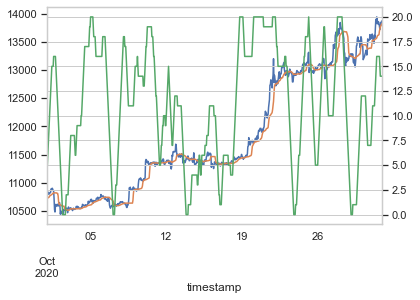

In [148]:
median = ohlcv.close.rolling(20).median()

p1 = ohlcv.close > median          ##當今天的假價格大於中位數
p2 = ohlcv.close.shift() > median    ##當昨天的價格大於中位數

mmi = (p1 & p2).astype(int).rolling(20).sum()        ##當p1為true且p2為true 才會發生 為1
                                                     ##看最近20天成立的次數 加總

ohlcv.close["2020-10"].plot()
median["2020-10"].plot()
mmi["2020-10"].plot(secondary_y = True)

<AxesSubplot:>

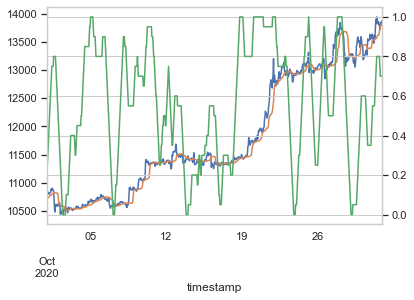

In [154]:
## 將又癲的y軸標準化為0-1
mmi = (p1 & p2).astype(int).rolling(20).mean()  ##
ohlcv.close["2020-10"].plot()
median["2020-10"].plot()
mmi["2020-10"].plot(secondary_y = True)

### Modify SMA stratedy套用至修改原本的策略

  0%|          | 0/256 [00:00<?, ?it/s]

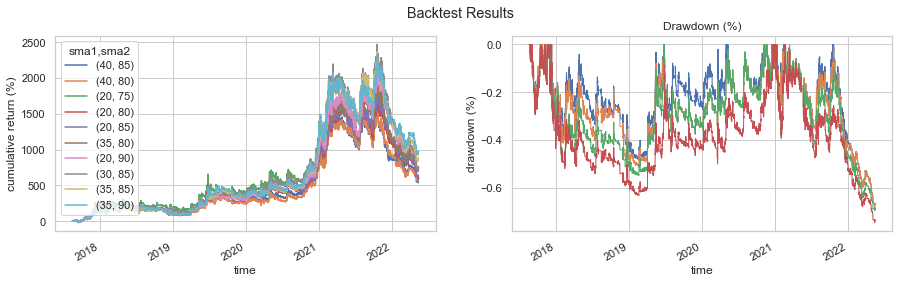

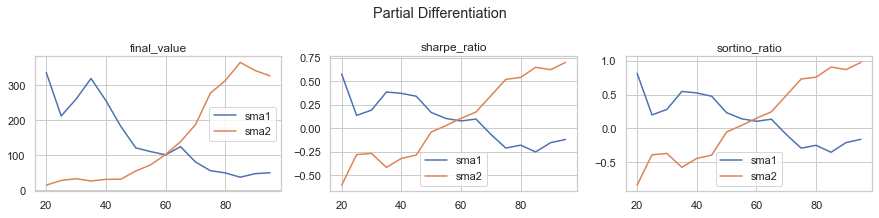

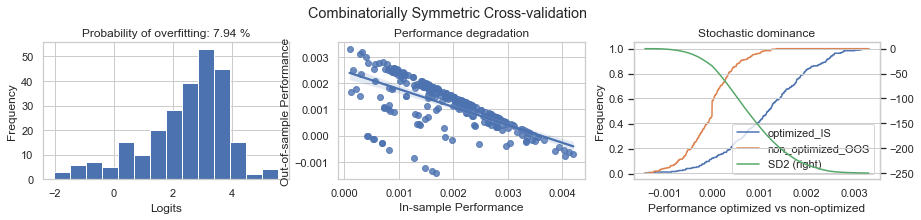

Output()

In [159]:
import numpy as np
from finlab_crypto import Strategy   ##decorator

@Strategy(sma1=20, sma2=60)
def mmi_sma_strategy(ohlcv_eth):
    close = ohlcv_eth.close

    sma20 = close.rolling(mmi_sma_strategy.sma1).mean()
    sma60 = close.rolling(mmi_sma_strategy.sma2).mean()

    entries = (sma20 > sma60) & (sma20.shift() < sma60.shift())
    exits = (sma20 < sma60) & (sma20.shift() > sma60.shift())
    
    figures = {
        'overlaps' :{
            'sma20' : sma20,
            'sma60' :sma60
        }
    }
    
    median = ohlcv.close.rolling(20).median()

    p1 = ohlcv.close > median          ##當今天的假價格大於中位數
    p2 = ohlcv.close.shift() > median    ##當昨天的價格大於中位數

    mmi = (p1 & p2).astype(int).rolling(20).sum()        ##當p1為true且p2為true 才會發生 為1
                                                         ##看最近20天成立的次數 加總
        
    entries = entries & (mmi > 0.5)     ##新的進場點為entries & (mmi > 0.5) 
    
        
    return entries, exits, figures

variables={'sma1' : np.arange(20, 100, 5), 'sma2' : np.arange(20, 100, 5)}   ##最佳化參數調整為較小值 目的做交易次數較高的策略
portfolio_eth = mmi_sma_strategy.backtest(ohlcv,  variables  = variables, freq = '1h', fees = 0.001, slippage = 0.001, plot = True)     ##滑價slippage

## 將filters封裝 重複利用

將不同的filters和不同的strategies做不同組合，參數優化

### 封裝filter

In [158]:
from finlab_crypto.strategy import Filter

@Filter(timperiod=20)
def mmi_filter(ohlcv):
    median = ohlcv.close.rolling(mmi_filter.timperiod).median()

    p1 = ohlcv.close > median         
    p2 = ohlcv.close.shift() > median    

    mmi = (p1 & p2).astype(int).rolling(mmi_filter.timperiod).sum()
    
    figures = {
        "figures" : {
            "mmi_index" : "mmi"
        }
    }
    
    return mmi >0.5, figures
    
f40 = mmi_filter.create({"timeperiod" : 40})
f40(ohlcv)
    

(timeperiod                    40
 timestamp                       
 2017-08-17 04:00:00+00:00  False
 2017-08-17 05:00:00+00:00  False
 2017-08-17 06:00:00+00:00  False
 2017-08-17 07:00:00+00:00  False
 2017-08-17 08:00:00+00:00  False
 ...                          ...
 2022-05-15 15:00:00+00:00   True
 2022-05-15 16:00:00+00:00   True
 2022-05-15 17:00:00+00:00   True
 2022-05-15 18:00:00+00:00   True
 2022-05-15 19:00:00+00:00   True
 
 [41458 rows x 1 columns],
 {'figures': {'mmi_index': 'mmi'}})

### Optimization

  0%|          | 0/256 [00:00<?, ?it/s]

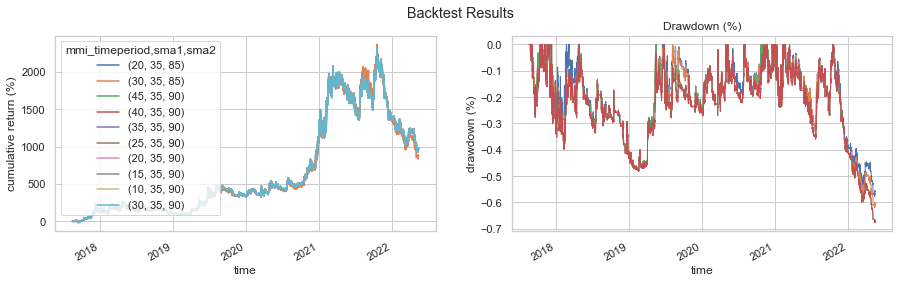

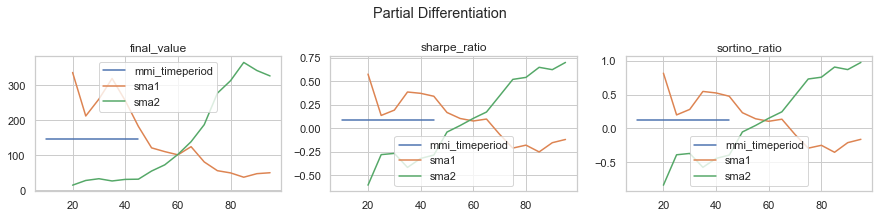

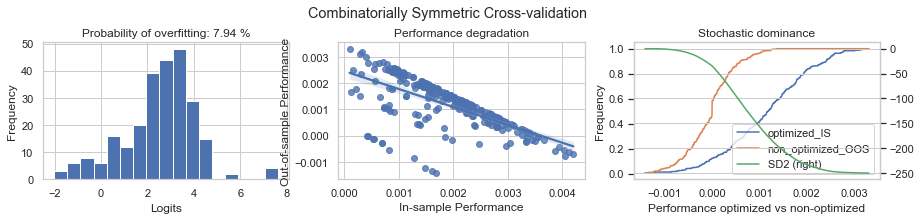

Output()

In [165]:
variables={'sma1' : np.arange(20, 100, 5), 'sma2' : np.arange(20, 100, 5)}   

f_mmi = mmi_filter.create({"timeperiod" : np.arange(10, 50, 5)})    ##策略參數優化

portfolio = sma_strategy.backtest(ohlcv,  variables = variables, filters = {"mmi" : f_mmi} , freq = '1h', fees = 0.001, slippage = 0.001, plot = True)     

## Final Strategy

輸入最佳化後的參數，檢驗策略是否有照著我們想要的結果執行

In [168]:
variables={'sma1' : 35, 'sma2' : 80}   

f_mmi = mmi_filter.create({"timeperiod" : 20})    ##策略參數優化

portfolio = sma_strategy.backtest(ohlcv,  variables = variables, filters = {"mmi" : f_mmi} , freq = '1h', fees = 0.001, slippage = 0.001, plot = True)     

Exception: cannot support subfigure type

In [172]:
from finlab_crypto.strategy import Filter

@Filter(timperiod=20)
def mmi_filter(ohlcv):
    median = ohlcv.close.rolling(mmi_filter.timperiod).median()

    p1 = ohlcv.close > median         
    p2 = ohlcv.close.shift() > median    

    mmi = (p1 & p2).astype(int).rolling(mmi_filter.timperiod).sum()
    
    figures = {}
    
    return mmi >0.5, figures

In [173]:
variables = {'sma1': 35, 'sma2': 80}
f_mmi = mmi_filter.create({'timeperiod': 20})

portfolio = sma_strategy.backtest(ohlcv, variables=variables, filters={'mmi': f_mmi}, freq='1h', plot=True)